In [101]:
import pandas as pd
from pandas import DataFrame
from pandas import read_excel, pivot_table
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

In [102]:
df = read_excel("https://data.hossam.kr/E04/beans.xlsx")
df

,수분함유량,강도
0,36,29
1,40,32
2,34,29
3,44,40
4,33,31
5,36,29
6,40,34
7,33,30
8,26,25
9,36,31


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   수분함유량   10 non-null     int64
 1   강도      10 non-null     int64
dtypes: int64(2)
memory usage: 292.0 bytes


In [104]:
df.describe()

,수분함유량,강도
count,10.00000,10.000000
mean,35.80000,31.000000
std,4.91709,3.944053
min,26.00000,25.000000
25%,33.25000,29.000000
50%,36.00000,30.500000
75%,39.00000,31.750000
max,44.00000,40.000000


In [105]:
df.columns = ['Moisture', 'Hard']

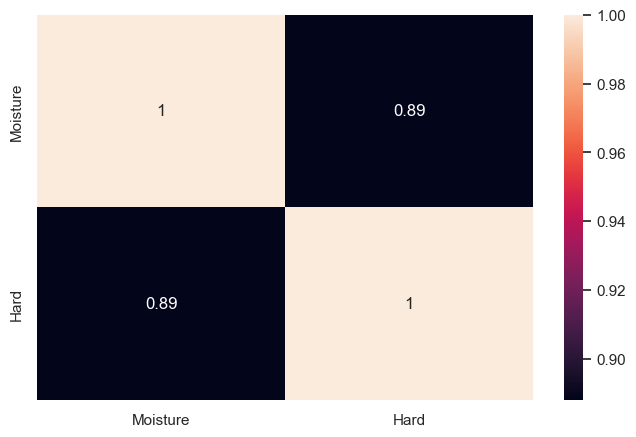

In [106]:
# 숫자형 변수 간의 상관 관계를 계산하여 히트맵 그리기
plt.figure(figsize=(8,5))
sns.set(font_scale=1.0)
sns.heatmap(df.corr(), annot=True, cbar=True)
plt.show()

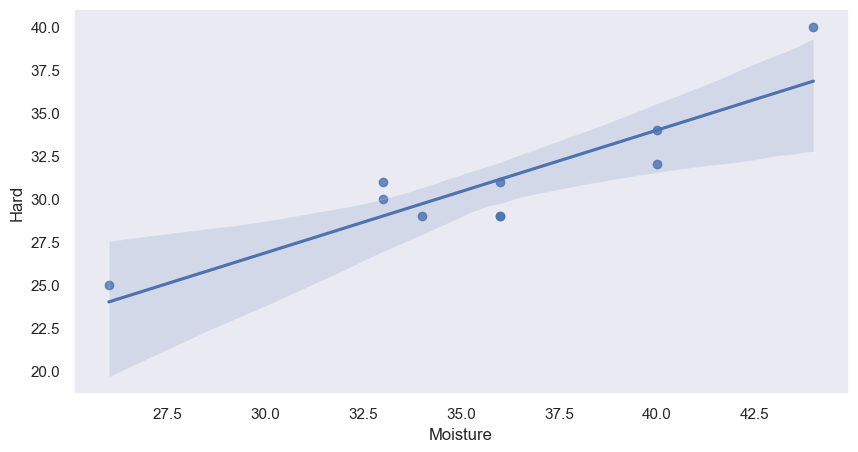

In [107]:
plt.rcParams['figure.figsize'] = (10, 5)
sns.regplot(data=df, x='Moisture', y='Hard')
plt.grid()
plt.show()
plt.close()

In [108]:
x = df.loc[:, ['Moisture']].values
x

array([[36],
       [40],
       [34],
       [44],
       [33],
       [36],
       [40],
       [33],
       [26],
       [36]], dtype=int64)

In [109]:
import statsmodels.api as sm
results = sm.OLS(df['Hard'], sm.add_constant(x)).fit()
results.summary()

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Hard   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     29.85
Date:                Mon, 24 Jul 2023   Prob (F-statistic):           0.000599
Time:                        17:25:19   Log-Likelihood:                -19.614
No. Observations:                  10   AIC:                             43.23
Df Residuals:                       8   BIC:                             43.83
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.4991      4.707      1.168      0.276      -5.355      16.353
x1             0.7123      0.130      5.463      0.001       0.412       1.013
==============================================================================
Omnibus:                        0.502   Durbin-Watson:                   1.420
Prob(Omnibus):                  0.778   Jarque-Bera (JB):                0.530
Skew:                           0.264   Prob(JB):                        0.767
Kurtosis:                       2.004   Cond. No.                         280.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

결과 해석
- 회귀식은 Hard = 0.7123 * 습기 + 5.499
- F-statistic의 p-value는 0.0005로 0.05보다 작기에 이 회귀식은 회귀분석 모델 전체에 대해 통계적으로 의미가 있다.
- x1(습기)의 p-value값이 0.001로 강도와 유의미한 관계를 가지고 있다.
- 0.71양수의 관계를 보이기 때문에 양의 상관관계가 있다고 할 수 있다.
- 마지막으로 모델 적합성 = 설명력(Adj. R-squared:)은 0.78정도로 굉장히 높은 수치를 보이기때문에 해당 회귀모델이 설명할 수 있는 데이터의 설명력을 나타낸다. 높을 수록 좋다
- R-squeared 가 0.21로 모델의 설명력이 낮다는 것을 확인 할 수 있다. 이는 더 높은 영향력을 찾을 변수를 추가하거나 다른 변수를 선택할 필요가 있다고 판단된다.   

문제 2

In [110]:
df = read_excel("https://data.hossam.kr/E04/aircon.xlsx")
df

,예약대수,판매대수
0,19,33
1,23,51
2,26,40
3,29,49
4,30,50
5,38,69
6,39,70
7,46,64
8,49,89
9,58,98


In [111]:
df.columns = ['Reservation', 'sale']

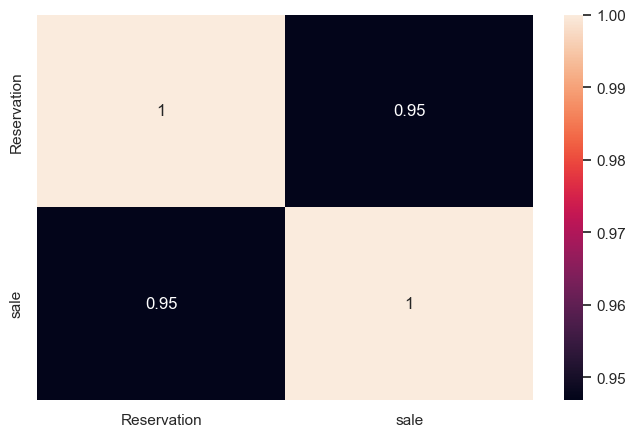

In [112]:
plt.figure(figsize=(8,5))
sns.set(font_scale=1.0)
sns.heatmap(df.corr(), annot=True, cbar=True)
plt.show()

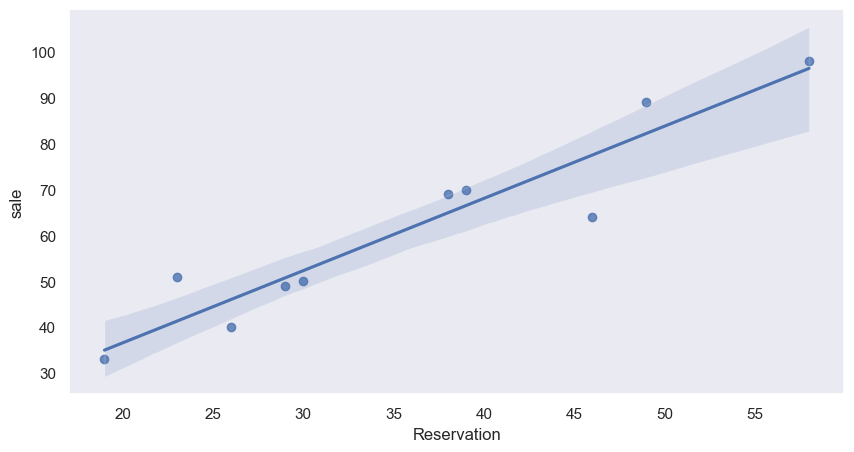

In [113]:
plt.rcParams['figure.figsize'] = (10, 5)
sns.regplot(data=df, x='Reservation', y='sale')
plt.grid()
plt.show()
plt.close()

In [114]:
x = df.loc[:, ['Reservation']].values
x

array([[19],
       [23],
       [26],
       [29],
       [30],
       [38],
       [39],
       [46],
       [49],
       [58]], dtype=int64)

In [115]:
results = sm.OLS(df['sale'], sm.add_constant(x)).fit()
results.summary()

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   sale   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     69.40
Date:                Mon, 24 Jul 2023   Prob (F-statistic):           3.26e-05
Time:                        17:25:20   Log-Likelihood:                -32.667
No. Observations:                  10   AIC:                             69.33
Df Residuals:                       8   BIC:                             69.94
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0689      7.113      0.713      0.496     -11.333      21.471
x1             1.5751      0.189      8.331      0.000       1.139       2.011
==============================================================================
Omnibus:                        1.408   Durbin-Watson:                   2.910
Prob(Omnibus):                  0.495   Jarque-Bera (JB):                0.497
Skew:                          -0.541   Prob(JB):                        0.780
Kurtosis:                       2.849   Cond. No.                         119.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

결과 해석
- 회귀식은 sale = 1.575 * reservation + 5.068
- F-statistic의 p-value는 3.26e-05로 0.05보다 작기에 이 회귀식은 회귀분석 모델 전체에 대해 통계적으로 의미가 있다.
- x1(예약)의 p-value값이 0.000로 강도와 유의미한 관계를 가지고 있다.
- 1.575양수의 관계를 보이기 때문에 양의 상관관계가 있다고 할 수 있다.
- 마지막으로 모델 적합성 = 설명력(Adj. R-squared:)은 0.89정도로 굉장히 높은 수치를 보이기때문에 해당 회귀모델이 설명할 수 있는 데이터의 설명력을 나타낸다. 높을 수록 좋다


In [116]:
sale = 1.575 *150 + 5.068
print(sale)

241.318


In [117]:
df = read_excel("https://data.hossam.kr/E04/galton.xlsx")
df

,child,parent
0,61.7,70.5
1,61.7,68.5
2,61.7,65.5
3,61.7,64.5
4,61.7,64.0
...,...,...
923,73.7,69.5
924,73.7,69.5
925,73.7,69.5
926,73.7,69.5


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 928 entries, 0 to 927
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   child   928 non-null    float64
 1   parent  928 non-null    float64
dtypes: float64(2)
memory usage: 14.6 KB


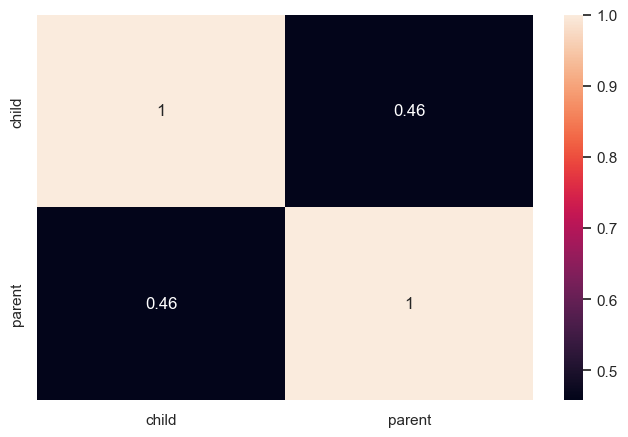

In [119]:
plt.figure(figsize=(8,5))
sns.set(font_scale=1.0)
sns.heatmap(df.corr(), annot=True, cbar=True)
plt.show()

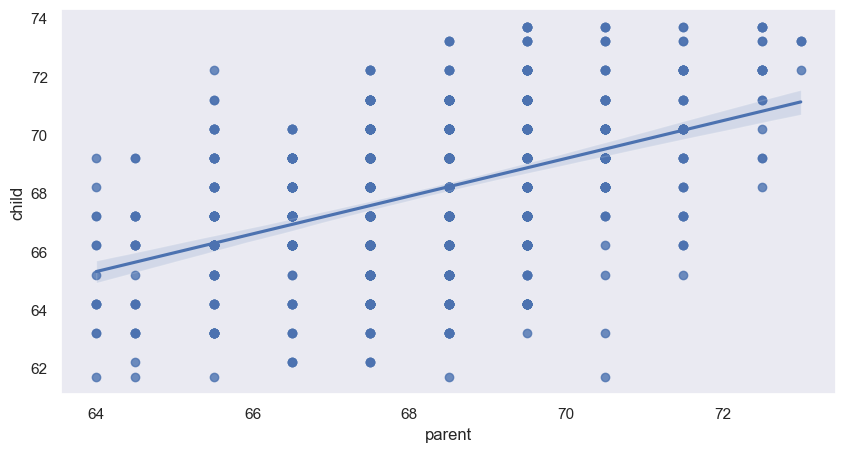

In [120]:
plt.rcParams['figure.figsize'] = (10, 5)
sns.regplot(data=df, x='parent', y='child')
plt.grid()
plt.show()
plt.close()

In [121]:
x = df.loc[:, ['parent']].values
x

array([[70.5],
       [68.5],
       [65.5],
       [64.5],
       [64. ],
       [67.5],
       [67.5],
       [67.5],
       [66.5],
       [66.5],
       [66.5],
       [64.5],
       [70.5],
       [69.5],
       [68.5],
       [68.5],
       [68.5],
       [68.5],
       [68.5],
       [68.5],
       [68.5],
       [67.5],
       [67.5],
       [67.5],
       [67.5],
       [67.5],
       [66.5],
       [66.5],
       [66.5],
       [65.5],
       [65.5],
       [65.5],
       [65.5],
       [65.5],
       [65.5],
       [65.5],
       [65.5],
       [65.5],
       [64.5],
       [64.5],
       [64.5],
       [64.5],
       [64. ],
       [64. ],
       [69.5],
       [69.5],
       [69.5],
       [69.5],
       [69.5],
       [69.5],
       [69.5],
       [69.5],
       [69.5],
       [69.5],
       [69.5],
       [69.5],
       [69.5],
       [69.5],
       [69.5],
       [69.5],
       [68.5],
       [68.5],
       [68.5],
       [68.5],
       [68.5],
       [68.5],
       [68

In [122]:
results = sm.OLS(df['child'], sm.add_constant(x)).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  child   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     246.8
Date:                Mon, 24 Jul 2023   Prob (F-statistic):           1.73e-49
Time:                        17:25:21   Log-Likelihood:                -2063.6
No. Observations:                 928   AIC:                             4131.
Df Residuals:                     926   BIC:                             4141.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.9415      2.811      8.517      0.000      18.425      29.458
x1             0.6463      0.041     15.711      0.000       0.566       0.727
==============================================================================
Omnibus:                       11.057   Durbin-Watson:                   0.046
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               10.944
Skew:                          -0.241   Prob(JB):                      0.00420
Kurtosis:                       2.775   Cond. No.                     2.61e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.61e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

결과 해석
- 회귀식은 child = 0.6463 * parents + 23.9415
- F-statistic의 p-value는 1.73e-49로 0.05보다 작기에 이 회귀식은 회귀분석 모델 전체에 대해 통계적으로 의미가 있다.
- x1(부모의 키)의 p-value값이 0.000로 강도와 유의미한 관계를 가지고 있다.
- 0.6463양수의 관계를 보이기 때문에 양의 상관관계가 있다고 할 수 있다.
- 마지막으로 모델 적합성 = 설명력(Adj. R-squared:)은 0.21정도로 낮은 수치를 보인다. 과소적합 형태이거나 아이의 키를 설명할 수 있는 변수가 더 많은 것으로 추정된다.

In [123]:
child = 0.6463 * 80 + 23.9415
child

75.6455